The purpose of this code is to analyze if there are very basic betting paterns that may be profitable. Specifically, the hypothesis to test is if betting on the odds favorite for every game is advantagous or if betting on the underdawg is better. Additionally, we will study the over and under of the point spread.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the main dataset
df = pd.read_csv('/kaggle/input/nfl-scores-and-betting-data/spreadspoke_scores.csv')

# Display the first 5 records
df.head()


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [30]:
# Filter rows where team_favorite_id is not null
df_filtered = df[df['team_favorite_id'].notnull()]

# Display the first 5 records
df_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN


In [31]:
# Determine the actual winning team
df_filtered.loc[:, 'winning_team'] = df_filtered.apply(
    lambda row: row['team_home'] if row['score_home'] > row['score_away'] 
                else row['team_away'],
    axis=1
)

# Check if the favorite won
df_filtered.loc[:, 'favorite_won'] = df_filtered['team_favorite_id'] == df_filtered['winning_team']

df_filtered.head()

/tmp/ipykernel_36/1131641666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'winning_team'] = df_filtered.apply(
/tmp/ipykernel_36/1131641666.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'favorite_won'] = df_filtered['team_favorite_id'] == df_filtered['winning_team']


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,winning_team,favorite_won
170,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN,Green Bay Packers,False
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,Green Bay Packers,False
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,New York Jets,False
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,Kansas City Chiefs,False
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,Baltimore Colts,False


In [32]:
# create a dictionary to define the acronym for team_favorite_id

# Drop missing team_favorite_id values and get unique combinations
distinct_combos = df[df['team_favorite_id'].notnull()][['team_favorite_id', 'team_home']].drop_duplicates()

# Sort for readability
distinct_combos = distinct_combos.sort_values(by=['team_favorite_id', 'team_home'])

# Display the result
print(distinct_combos)

distinct_combos.to_csv('team_favorite_mappings.csv', index=False)


team_map = {
    'WAS': ['Washington Redskins', 'Washington Football Team', 'Washington Commanders'],
    'LVR': ['Las Vegas Raiders', 'Oakland Raiders','Los Angelas Raiders'],
    'LA': ['Los Angeles Rams', 'St. Louis Rams'],
    'LAR': ['Los Angeles Rams'],
    'LV': ['Las Vegas Raiders'],
    'LAC': ['San Diego Chargers', 'Los Angeles Chargers'],
    'BAL': ['Baltimore Ravens'],
    'GB': ['Green Bay Packers'],
    'ARI': ['Arizona Cardinals'],
    'ATL':['Atlanta Falcons'],
    'CAR':['Carolina Panthers'],
    'CHI':['Chicago Bears'],
    'CIN':['Cincinnati Bengals'],
    'CLE':['Cleveland Browns'],
    'DAL':['Dallas Cowboys'],
    'DEN':['Denver Broncos'],
    'DET':['Detroit Lions'],
    'HOU':['Houston Oilers'],
    'IND':['Baltimore Colts','Indianapolis Colts'],
    'JAX':['Jacksonville Jaguars'],
    'KC':['Kansas City Chiefs'],
    'MIA':['Miami Dolphins'],
    'MIN':['Minnesota Vikings'],
    'NE':['New England Patriots'],
    'NJY':['New York Jets'], # could be an error, but NJY appears
    'NO':['New Orleans Saints'],
    'NYG':['New York Giants'],
    'NYJ':['New York Jets'],
    'PHI':['Philadelphia Eagles'],
    'PIT':['Pittsburgh Steelers'],
    'SEA':['Seattle Seahawks'],
    'SF':['San Francisco 49ers'],
    'TB':['Tampa Bay Buccaneers'],
    'TEN':['Houston Oilers','Tennessee Titans'],
    'BUF':['Buffalo Bills']
}

      team_favorite_id                 team_home
5870               ARI         Arizona Cardinals
4373               ARI           Atlanta Falcons
3121               ARI           Baltimore Colts
11643              ARI             Buffalo Bills
12727              ARI         Carolina Panthers
...                ...                       ...
6550               WAS      Tampa Bay Buccaneers
6698               WAS          Tennessee Oilers
13246              WAS     Washington Commanders
12781              WAS  Washington Football Team
2542               WAS       Washington Redskins

[1117 rows x 2 columns]


In [33]:
# Map acronym to full name(s)
df_filtered['favorite_team_full_list'] = df_filtered['team_favorite_id'].map(team_map)

# Check if winning team is in list of possible names
df_filtered['favorite_won'] = df_filtered.apply(
    lambda row: row['winning_team'] in row['favorite_team_full_list']
                if isinstance(row['favorite_team_full_list'], list)
                else False,
    axis=1
)

unmatched_ids = df_filtered[~df_filtered['team_favorite_id'].isin(team_map.keys())]['team_favorite_id'].unique()

df_filtered = df_filtered[df_filtered['team_favorite_id'] != 'PICK']

df_filtered["team_favorite_id"] = df_filtered["team_favorite_id"].replace({
    "LV": "LVR",
    "NJY": "NYJ"
})

df_filtered = df_filtered[df_filtered['schedule_season'] >= 1979]

df_filtered["total_points"] = df_filtered["score_home"] + df_filtered["score_away"]

df_filtered["over_under_line"] = pd.to_numeric(df_filtered["over_under_line"], errors="coerce")

df_filtered["over_under_result"] = df_filtered.apply(
    lambda row: "Over" if row["total_points"] > row["over_under_line"]
                else ("Under" if row["total_points"] < row["over_under_line"] else "Push"),
    axis=1
)

print("Unmatched team_favorite_id values:")
print(unmatched_ids)

/tmp/ipykernel_36/3641167434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['favorite_team_full_list'] = df_filtered['team_favorite_id'].map(team_map)
/tmp/ipykernel_36/3641167434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['favorite_won'] = df_filtered.apply(


Unmatched team_favorite_id values:
['PICK']


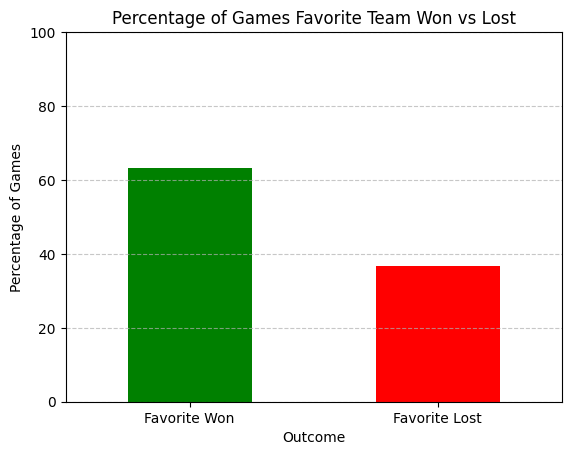

In [34]:
# Safe mapping with fallback
df_filtered['favorite_team_full_list'] = df_filtered['team_favorite_id'].apply(
    lambda x: team_map.get(x, [])
)

# Check if the winner is in the list of possible names
df_filtered['favorite_won'] = df_filtered.apply(
    lambda row: row['winning_team'] in row['favorite_team_full_list'],
    axis=1
)

# Plot percentages
favorite_win_percentage = df_filtered['favorite_won'].value_counts(normalize=True) * 100
favorite_win_percentage = favorite_win_percentage.rename({True: 'Favorite Won', False: 'Favorite Lost'})

favorite_win_percentage.plot(kind='bar', color=['green', 'red'])
plt.title('Percentage of Games Favorite Team Won vs Lost')
plt.ylabel('Percentage of Games')
plt.xlabel('Outcome')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [35]:
def calc_margin(row):
    if row['favorite_team_full_list'] and row['team_home'] in row['favorite_team_full_list']:
        return row['score_home'] - row['score_away']
    elif row['favorite_team_full_list'] and row['team_away'] in row['favorite_team_full_list']:
        return row['score_away'] - row['score_home']
    else:
        return None  # No favorite identified

# Calculate how many points the favorite won or lost by
df_filtered['favorite_margin'] = df_filtered.apply(calc_margin, axis=1)

# Determine if the favorite covered the spread
df_filtered['favorite_covered'] = df_filtered.apply(
    lambda row: (
        row['favorite_margin'] is not None and
        row['spread_favorite'] is not None and
        row['favorite_margin'] > abs(row['spread_favorite'])  # Use absolute value to compare
    ),
    axis=1
)

df_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_wind_mph,weather_humidity,weather_detail,winning_team,favorite_won,favorite_team_full_list,total_points,over_under_result,favorite_margin,favorite_covered
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31,16,Detroit Lions,TB,-3.0,...,9.0,87.0,NaN,Tampa Bay Buccaneers,True,[Tampa Bay Buccaneers],47,Over,15.0,True
2502,9/2/1979,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,MIA,-5.0,...,15.0,74.0,NaN,Miami Dolphins,True,[Miami Dolphins],16,Under,2.0,False
2503,9/2/1979,1979,1,False,Chicago Bears,6,3,Green Bay Packers,CHI,-3.0,...,11.0,68.0,NaN,Chicago Bears,True,[Chicago Bears],9,Under,3.0,False
2504,9/2/1979,1979,1,False,Denver Broncos,10,0,Cincinnati Bengals,DEN,-3.0,...,6.0,38.0,NaN,Denver Broncos,True,[Denver Broncos],10,Under,10.0,True
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14,0,Baltimore Colts,KC,-1.0,...,8.0,71.0,NaN,Kansas City Chiefs,True,[Kansas City Chiefs],14,Under,14.0,True


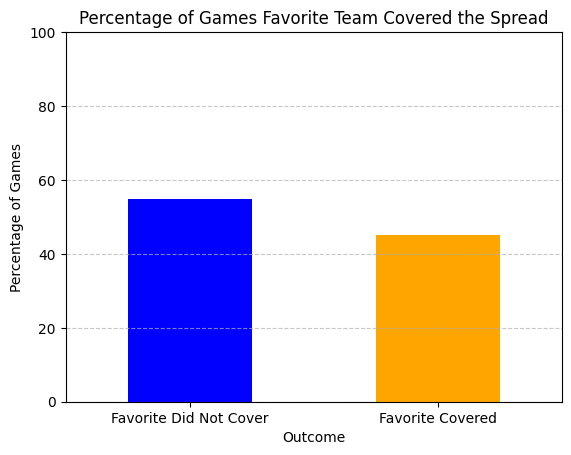

In [36]:
# Compute percentage (normalize=True gives proportion)
cover_percentage = df_filtered['favorite_covered'].value_counts(normalize=True) * 100

# Rename for clarity
cover_percentage = cover_percentage.rename({True: 'Favorite Covered', False: 'Favorite Did Not Cover'})

# Plot
cover_percentage.plot(kind='bar', color=['blue', 'orange'])
plt.title('Percentage of Games Favorite Team Covered the Spread')
plt.ylabel('Percentage of Games')
plt.xlabel('Outcome')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [37]:
# Count how many games were bet on (i.e., all with a favorite)
num_games = df_filtered['favorite_covered'].notnull().sum()

# Count how many favorites actually covered
num_wins = df_filtered['favorite_covered'].sum()

# Number of losses
num_losses = num_games - num_wins

# Payout for each win at -110 odds
win_payout = 10 * (100 / 110)  # ≈ $9.09 profit per win

# Total return
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

print(f"Total Games Bet: {num_games}")
print(f"Favorites Covered: {num_wins}")
print(f"Favorites Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

Total Games Bet: 11442
Favorites Covered: 5152
Favorites Did Not Cover: 6290
Total Winnings: $46836.36
Total Losses: -$62900.00
Net Profit: $-16063.64
Return on Investment (ROI): -14.04%


In [38]:
df_2024 = df_filtered[df_filtered['schedule_season'] == 2024].copy()

df_2024.to_csv('/kaggle/working/df_2024.csv', index=False)

# Count games with valid favorite_covered values
num_games = df_2024['favorite_covered'].notnull().sum()
num_wins = df_2024['favorite_covered'].sum()
num_losses = num_games - num_wins

# Calculate payouts
win_payout = 10 * (100 / 110)  # $9.09 profit per win
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

# Display results
print(f"--- 2024 Season Betting Summary ---")
print(f"Total Games Bet: {num_games}")
print(f"Favorites Covered: {num_wins}")
print(f"Favorites Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

--- 2024 Season Betting Summary ---
Total Games Bet: 285
Favorites Covered: 146
Favorites Did Not Cover: 139
Total Winnings: $1327.27
Total Losses: -$1390.00
Net Profit: $-62.73
Return on Investment (ROI): -2.20%


In [39]:
# Count how many games were bet on (i.e., where spread was set)
num_games = df_filtered['favorite_covered'].notnull().sum()

# Count how many underdogs covered (i.e., favorite did NOT cover)
num_wins = (~df_filtered['favorite_covered']).sum()

# Number of losses
num_losses = num_games - num_wins

# Payout for each win at -110 odds
win_payout = 10 * (100 / 110)  # ≈ $9.09 profit per win

# Total return
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

# Display results
print(f"--- Underdog Betting Summary ---")
print(f"Total Games Bet: {num_games}")
print(f"Underdogs Covered: {num_wins}")
print(f"Underdogs Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

--- Underdog Betting Summary ---
Total Games Bet: 11442
Underdogs Covered: 6290
Underdogs Did Not Cover: 5152
Total Winnings: $57181.82
Total Losses: -$51520.00
Net Profit: $5661.82
Return on Investment (ROI): 4.95%


In [40]:
# Filter for 2024 season
df_2024 = df_filtered[df_filtered['schedule_season'] == 2024].copy()

# Optional: Save to CSV
df_2024.to_csv('/kaggle/working/df_2024.csv', index=False)

# Count games with valid spread outcomes
num_games = df_2024['favorite_covered'].notnull().sum()

# Count how many times the UNDERDOG covered (i.e., favorite did NOT cover)
num_wins = (~df_2024['favorite_covered']).sum()

# Number of losses
num_losses = num_games - num_wins

# Calculate payouts
win_payout = 10 * (100 / 110)  # $9.09 profit per win
total_winnings = num_wins * win_payout
total_losses = num_losses * 10

net_profit = total_winnings - total_losses
roi = (net_profit / (num_games * 10)) * 100

# Display results
print(f"--- 2024 Season Underdog Betting Summary ---")
print(f"Total Games Bet: {num_games}")
print(f"Underdogs Covered: {num_wins}")
print(f"Underdogs Did Not Cover: {num_losses}")
print(f"Total Winnings: ${total_winnings:.2f}")
print(f"Total Losses: -${total_losses:.2f}")
print(f"Net Profit: ${net_profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")


--- 2024 Season Underdog Betting Summary ---
Total Games Bet: 285
Underdogs Covered: 139
Underdogs Did Not Cover: 146
Total Winnings: $1263.64
Total Losses: -$1460.00
Net Profit: $-196.36
Return on Investment (ROI): -6.89%


In [41]:
df_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_wind_mph,weather_humidity,weather_detail,winning_team,favorite_won,favorite_team_full_list,total_points,over_under_result,favorite_margin,favorite_covered
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31,16,Detroit Lions,TB,-3.0,...,9.0,87.0,NaN,Tampa Bay Buccaneers,True,[Tampa Bay Buccaneers],47,Over,15.0,True
2502,9/2/1979,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,MIA,-5.0,...,15.0,74.0,NaN,Miami Dolphins,True,[Miami Dolphins],16,Under,2.0,False
2503,9/2/1979,1979,1,False,Chicago Bears,6,3,Green Bay Packers,CHI,-3.0,...,11.0,68.0,NaN,Chicago Bears,True,[Chicago Bears],9,Under,3.0,False
2504,9/2/1979,1979,1,False,Denver Broncos,10,0,Cincinnati Bengals,DEN,-3.0,...,6.0,38.0,NaN,Denver Broncos,True,[Denver Broncos],10,Under,10.0,True
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14,0,Baltimore Colts,KC,-1.0,...,8.0,71.0,NaN,Kansas City Chiefs,True,[Kansas City Chiefs],14,Under,14.0,True


In [42]:
df_filtered.to_csv('/kaggle/working/df_filtered.csv', index=False)

In [43]:
current_team_map = {
    'WAS': ['Washington Commanders'],
    'LVR': ['Las Vegas Raiders'],
    'LAR': ['Los Angeles Rams'],
    'LAC': ['Los Angeles Chargers'],
    'BAL': ['Baltimore Ravens'],
    'GB': ['Green Bay Packers'],
    'ARI': ['Arizona Cardinals'],
    'ATL':['Atlanta Falcons'],
    'CAR':['Carolina Panthers'],
    'CHI':['Chicago Bears'],
    'CIN':['Cincinnati Bengals'],
    'CLE':['Cleveland Browns'],
    'DAL':['Dallas Cowboys'],
    'DEN':['Denver Broncos'],
    'DET':['Detroit Lions'],
    'HOU':['Houston Oilers'],
    'IND':['Indianapolis Colts'],
    'JAX':['Jacksonville Jaguars'],
    'KC':['Kansas City Chiefs'],
    'MIA':['Miami Dolphins'],
    'MIN':['Minnesota Vikings'],
    'NE':['New England Patriots'],
    'NO':['New Orleans Saints'],
    'NYG':['New York Giants'],
    'NYJ':['New York Jets'],
    'PHI':['Philadelphia Eagles'],
    'PIT':['Pittsburgh Steelers'],
    'SEA':['Seattle Seahawks'],
    'SF':['San Francisco 49ers'],
    'TB':['Tampa Bay Buccaneers'],
    'TEN':['Tennessee Titans'],
    'BUF':['Buffalo Bills']
}

In [44]:
reverse_team_map = {
    # Cardinals
    "Arizona Cardinals": "Arizona Cardinals",
    "Phoenix Cardinals": "Arizona Cardinals",
    "St. Louis Cardinals": "Arizona Cardinals",

    # Falcons
    "Atlanta Falcons": "Atlanta Falcons",

    # Ravens / Colts
    "Baltimore Ravens": "Baltimore Ravens",
    "Baltimore Colts": "Indianapolis Colts",
    "Indianapolis Colts": "Indianapolis Colts",

    # Bills
    "Buffalo Bills": "Buffalo Bills",

    # Panthers
    "Carolina Panthers": "Carolina Panthers",

    # Bears
    "Chicago Bears": "Chicago Bears",

    # Bengals
    "Cincinnati Bengals": "Cincinnati Bengals",

    # Browns
    "Cleveland Browns": "Cleveland Browns",

    # Cowboys
    "Dallas Cowboys": "Dallas Cowboys",

    # Broncos
    "Denver Broncos": "Denver Broncos",

    # Lions
    "Detroit Lions": "Detroit Lions",

    # Packers
    "Green Bay Packers": "Green Bay Packers",

    # Texans / Oilers → Titans
    "Houston Texans": "Houston Texans",   # expansion franchise (2002)
    "Houston Oilers": "Tennessee Titans",
    "Tennessee Oilers": "Tennessee Titans",
    "Tennessee Titans": "Tennessee Titans",

    # Jaguars
    "Jacksonville Jaguars": "Jacksonville Jaguars",

    # Chiefs
    "Kansas City Chiefs": "Kansas City Chiefs",

    # Raiders
    "Las Vegas Raiders": "Las Vegas Raiders",
    "Oakland Raiders": "Las Vegas Raiders",
    "Los Angeles Raiders": "Las Vegas Raiders",

    # Rams
    "Los Angeles Rams": "Los Angeles Rams",
    "St. Louis Rams": "Los Angeles Rams",

    # Chargers
    "Los Angeles Chargers": "Los Angeles Chargers",
    "San Diego Chargers": "Los Angeles Chargers",

    # Dolphins
    "Miami Dolphins": "Miami Dolphins",

    # Vikings
    "Minnesota Vikings": "Minnesota Vikings",

    # Patriots
    "New England Patriots": "New England Patriots",

    # Saints
    "New Orleans Saints": "New Orleans Saints",

    # Giants
    "New York Giants": "New York Giants",

    # Jets
    "New York Jets": "New York Jets",

    # Eagles
    "Philadelphia Eagles": "Philadelphia Eagles",

    # Steelers
    "Pittsburgh Steelers": "Pittsburgh Steelers",

    # 49ers
    "San Francisco 49ers": "San Francisco 49ers",

    # Seahawks
    "Seattle Seahawks": "Seattle Seahawks",

    # Buccaneers
    "Tampa Bay Buccaneers": "Tampa Bay Buccaneers",

    # Washington franchise
    "Washington Commanders": "Washington Commanders",
    "Washington Football Team": "Washington Commanders",
    "Washington Redskins": "Washington Commanders",
}


In [45]:
# Step 1: Flip current_name_map so old names map to abbreviations
name_to_abbrev = {}
for abbrev, names in current_team_map.items():
    for name in names:
        name_to_abbrev[name] = abbrev

# Step 2: Create a helper function to go from old name → current description
def get_current_name(team_name):
    abbrev = name_to_abbrev.get(team_name)   # historical name → abbreviation
    if abbrev:
        return team_map.get(abbrev, [team_name])[0]  # abbrev → current description
    return team_name  # fallback if not found

# Step 3: Apply to home/away teams
df_filtered["team_home_current"] = df_filtered["team_home"].apply(get_current_name)
df_filtered["team_away_current"] = df_filtered["team_away"].apply(get_current_name)

# Reuse the same helper from before
def get_current_name(team_name):
    # First check if it's already an abbreviation in team_map
    if team_name in team_map:
        return team_map[team_name][0]
    # Otherwise check if it's a historical name in name_to_abbrev
    abbrev = name_to_abbrev.get(team_name)
    if abbrev:
        return team_map.get(abbrev, [team_name])[0]
    # Fallback to raw name if not found
    return team_name

# Apply to favorite team column
df_filtered["favorite_team"] = df_filtered["team_favorite_id"].apply(get_current_name)

In [46]:
df_filtered["team_home_current"] = df_filtered["team_home"].map(reverse_team_map)
df_filtered["team_away_current"] = df_filtered["team_away"].map(reverse_team_map)
df_filtered["winning_team_current"] = df_filtered["winning_team"].map(reverse_team_map)

In [47]:
# schedule_playoff → Regular Season / Playoffs
df_filtered["schedule_playoff"] = df_filtered["schedule_playoff"].map({
    False: "Regular Season",
    True: "Playoffs"
})

# favorite_won → Favorite Won / Underdog Won
df_filtered["favorite_won"] = df_filtered["favorite_won"].map({
    False: "Underdog Won",
    True: "Favorite Won"
})

# favorite_covered → Favorite Covered / Favorite did not Cover
df_filtered["favorite_covered"] = df_filtered["favorite_covered"].map({
    True: "Favorite Covered",
    False: "Favorite did not Cover"
})


In [48]:
df_filtered.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,favorite_won,favorite_team_full_list,total_points,over_under_result,favorite_margin,favorite_covered,team_home_current,team_away_current,favorite_team,winning_team_current
2501,9/1/1979,1979,1,Regular Season,Tampa Bay Buccaneers,31,16,Detroit Lions,TB,-3.0,...,Favorite Won,[Tampa Bay Buccaneers],47,Over,15.0,Favorite Covered,Tampa Bay Buccaneers,Detroit Lions,Tampa Bay Buccaneers,Tampa Bay Buccaneers
2502,9/2/1979,1979,1,Regular Season,Buffalo Bills,7,9,Miami Dolphins,MIA,-5.0,...,Favorite Won,[Miami Dolphins],16,Under,2.0,Favorite did not Cover,Buffalo Bills,Miami Dolphins,Miami Dolphins,Miami Dolphins
2503,9/2/1979,1979,1,Regular Season,Chicago Bears,6,3,Green Bay Packers,CHI,-3.0,...,Favorite Won,[Chicago Bears],9,Under,3.0,Favorite did not Cover,Chicago Bears,Green Bay Packers,Chicago Bears,Chicago Bears
2504,9/2/1979,1979,1,Regular Season,Denver Broncos,10,0,Cincinnati Bengals,DEN,-3.0,...,Favorite Won,[Denver Broncos],10,Under,10.0,Favorite Covered,Denver Broncos,Cincinnati Bengals,Denver Broncos,Denver Broncos
2505,9/2/1979,1979,1,Regular Season,Kansas City Chiefs,14,0,Baltimore Colts,KC,-1.0,...,Favorite Won,[Kansas City Chiefs],14,Under,14.0,Favorite Covered,Kansas City Chiefs,Indianapolis Colts,Kansas City Chiefs,Kansas City Chiefs


In [49]:
df_filtered.to_csv('/kaggle/working/tableau_by_game.csv', index=False)

In [50]:
teams_lookup = pd.DataFrame([
    {"team_id": abbrev, "team_name": names[0]}
    for abbrev, names in current_team_map.items()
])

print(teams_lookup)

   team_id              team_name
0      WAS  Washington Commanders
1      LVR      Las Vegas Raiders
2      LAR       Los Angeles Rams
3      LAC   Los Angeles Chargers
4      BAL       Baltimore Ravens
5       GB      Green Bay Packers
6      ARI      Arizona Cardinals
7      ATL        Atlanta Falcons
8      CAR      Carolina Panthers
9      CHI          Chicago Bears
10     CIN     Cincinnati Bengals
11     CLE       Cleveland Browns
12     DAL         Dallas Cowboys
13     DEN         Denver Broncos
14     DET          Detroit Lions
15     HOU         Houston Oilers
16     IND     Indianapolis Colts
17     JAX   Jacksonville Jaguars
18      KC     Kansas City Chiefs
19     MIA         Miami Dolphins
20     MIN      Minnesota Vikings
21      NE   New England Patriots
22      NO     New Orleans Saints
23     NYG        New York Giants
24     NYJ          New York Jets
25     PHI    Philadelphia Eagles
26     PIT    Pittsburgh Steelers
27     SEA       Seattle Seahawks
28      SF    

In [51]:
teams_lookup.to_csv('/kaggle/working/teams.csv', index=False)

In [52]:

# -------------------------------
# 1) CONFIG: map column names
# -------------------------------
COLS = {
    "year": ["schedule_season"],
    "home_team": ["team_home", "home_team", "Home Team"],
    "away_team": ["team_away", "away_team", "Away Team"],
    "home_pts": ["score_home", "home_score", "Home Score"],
    "away_pts": ["score_away", "away_score", "Away Score"],
    # prefer explicit favorite_team if present
    "favorite_team": ["favorite_team", "Favorite Team", "favorite"],
    # fallbacks for spread/ATS logic
    "favorite_covered": ["favorite_covered", "Favorite Covered"],  # "Favorite Covered"/"Favorite did not Cover"/"Push"
    "home_spread": ["spread_favorite", "home_spread", "closing_spread", "line_home"],  # if negative, home is favorite
}

def coalesce_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

def require_col(df, candidates, label):
    col = coalesce_col(df, candidates)
    if col is None:
        raise ValueError(f"Could not find a column for {label}. Tried: {candidates}")
    return col

def build_team_year_agg(df_in):
    # ---------- resolve columns ----------
    c_year      = require_col(df_in, COLS["year"], "year")
    c_home      = require_col(df_in, COLS["home_team"], "home team")
    c_away      = require_col(df_in, COLS["away_team"], "away team")
    c_home_pts  = require_col(df_in, COLS["home_pts"], "home points")
    c_away_pts  = require_col(df_in, COLS["away_pts"], "away points")

    c_fav_team       = coalesce_col(df_in, COLS["favorite_team"])
    c_fav_covered    = coalesce_col(df_in, COLS["favorite_covered"])
    c_home_spread    = coalesce_col(df_in, COLS["home_spread"])

    if c_fav_team is None and c_home_spread is None:
        raise ValueError("Need either a favorite team column OR a home-based spread column.")

    games = df_in.copy()

    # ---------- normalize team names ----------
    games[c_home] = games[c_home].replace(reverse_team_map)
    games[c_away] = games[c_away].replace(reverse_team_map)
    if c_fav_team is not None:
        games[c_fav_team] = games[c_fav_team].replace(reverse_team_map)

    # ---------- basic margins ----------
    games["home_margin"] = games[c_home_pts] - games[c_away_pts]
    games["away_margin"] = -games["home_margin"]

    # ---------- favorite flags ----------
    if c_fav_team is not None:
        games["_home_is_fav"] = (games[c_fav_team] == games[c_home])
        games["_away_is_fav"] = (games[c_fav_team] == games[c_away])
    else:
        # derive from sign of home_spread (negative => home favorite)
        games["_home_is_fav"] = games[c_home_spread] < 0
        games["_away_is_fav"] = games[c_home_spread] > 0

    # ---------- helper to explode to team rows ----------
    def make_team_rows(side):
        assert side in ("home", "away")
        team   = games[c_home] if side=="home" else games[c_away]
        opp    = games[c_away] if side=="home" else games[c_home]
        margin = games["home_margin"] if side=="home" else games["away_margin"]
        is_fav = games["_home_is_fav"] if side=="home" else games["_away_is_fav"]

        out = pd.DataFrame({
            "team": team,
            "opponent": opp,
            "year": games[c_year],
            "won_game": (margin > 0),
            "is_favorite": is_fav,
            "team_margin": margin
        })

        # Win as favorite
        out["won_as_favorite"] = out["won_game"] & out["is_favorite"]

        # Covered ATS (beating the spread):
        # Prefer explicit favorite_covered string if present; otherwise derive from spread sign + margin.
        if c_fav_covered is not None and c_fav_team is not None:
            fav_cov = games[c_fav_covered].fillna("Push")
            is_team_fav = is_fav
            out["covered_spread"] = np.where(
                is_team_fav, 
                fav_cov.eq("Favorite Covered"),
                fav_cov.eq("Favorite did not Cover")
            )
            out["covered_spread"] = out["covered_spread"] & fav_cov.ne("Push")
        elif c_home_spread is not None:
            # Using magnitude from home_spread only; treat abs spread as margin to clear.
            abs_spread = games[c_home_spread].abs()
            spread_from_team = np.where(is_fav, -abs_spread, abs_spread)
            out["covered_spread"] = (margin + spread_from_team) > 0
        else:
            out["covered_spread"] = False  # fallback if neither available

        # "Beating the point spread" (covering specifically when favored)
        out["beat_point_spread"] = out["covered_spread"] & out["is_favorite"]

        return out

    team_games = pd.concat([make_team_rows("home"), make_team_rows("away")], ignore_index=True)

    # ---------- aggregate to team × year ----------
    agg = (
        team_games
        .groupby(["team", "year"], as_index=False)
        .agg(
            games_played=("team", "count"),
            wins=("won_game", "sum"),
            times_favorited=("is_favorite", "sum"),
            wins_as_favorite=("won_as_favorite", "sum"),
            beating_the_spread=("covered_spread", "sum"),
            beating_the_point_spread=("beat_point_spread", "sum"),
            avg_margin=("team_margin", "mean")
        )
        .sort_values(["year", "team"])
    )

    # cast counts to int
    for c in [
        "games_played","wins","times_favorited",
        "wins_as_favorite","beating_the_spread","beating_the_point_spread"
    ]:
        agg[c] = agg[c].astype(int)

    return agg

# -------------------------------
# USAGE
# -------------------------------
# agg = build_team_year_agg(df_filtered)
# agg.to_csv("team_year_aggregates.csv", index=False)

agg

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,year,team,Avg Margin,Beating The Point Spread,Beating The Spread,Games Played,Times Favorited,Wins,Wins As Favorite
0,1966,Atlanta Falcons,NaN,0,0,14,0,3,0
1,1966,Baltimore Colts,NaN,0,0,14,0,9,0
2,1966,Boston Patriots,NaN,0,0,7,0,4,0
3,1966,Buffalo Bills,NaN,0,0,15,0,9,0
4,1966,Chicago Bears,NaN,0,0,14,0,5,0
...,...,...,...,...,...,...,...,...,...
1737,2024,San Francisco 49ers,NaN,0,0,17,0,6,0
1738,2024,Seattle Seahawks,NaN,0,0,17,0,10,0
1739,2024,Tampa Bay Buccaneers,NaN,0,0,18,0,10,0
1740,2024,Tennessee Titans,NaN,0,0,17,0,3,0


In [53]:
#agg.to_csv('/kaggle/working/tableau_team_agg.csv', index=False)